# Worksheet 16

Name:  Zeming Chen

UID: U98986406

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

<function matplotlib.pyplot.show(close=None, block=None)>

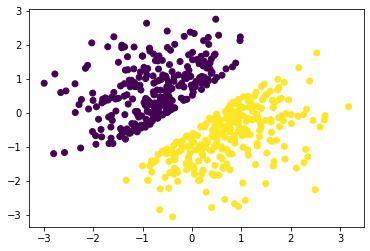

In [2]:
X, Y = generate_line_data()
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show

b) Fit a logistic regression model to the data a print out the coefficients.

In [5]:
model = LogisticRegression().fit(X, Y)
beta = model.coef_
intercept = model.intercept_
print(model.coef_)
print(model.intercept_)

[[ 4.11337993 -4.10105513]]
[0.05839469]


c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

<function matplotlib.pyplot.show(close=None, block=None)>

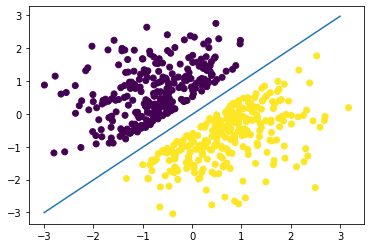

In [7]:
xplot = np.linspace(-3,3)
decision_bond = - intercept /beta[0][0] - beta[0][1] * xplot / beta[0][0]
plt.scatter(X[:,0], X[:,1], c = Y)
plt.plot(xplot, decision_bond)
plt.show

d) Using the above code, generate and plot the CIRCLE data.

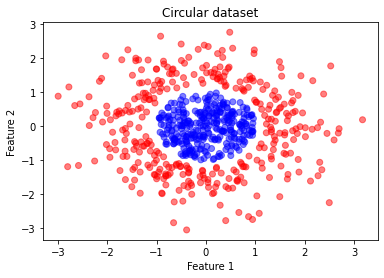

In [8]:
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

def generate_circle_data(t):
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

X, Y = generate_circle_data(t)

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circular dataset')
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

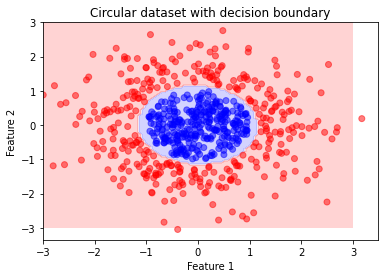

In [9]:
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

def generate_circle_data(t):
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

X, Y = generate_circle_data(t)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_poly, Y)

xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='bwr', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circular dataset with decision boundary')
plt.show()

f) Plot the decision boundary using the code below.

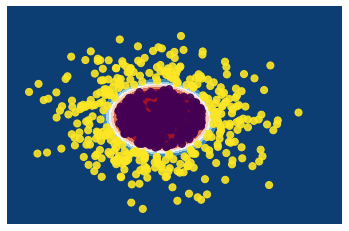

In [16]:
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

# transform mesh data to match the features used in training the model
poly = PolynomialFeatures(2)
meshData_poly = poly.fit_transform(meshData)

fig, ax = plt.subplots()
A = model.predict_proba(meshData_poly)[:, 1].reshape(xx.shape)
Z = model.predict(meshData_poly).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

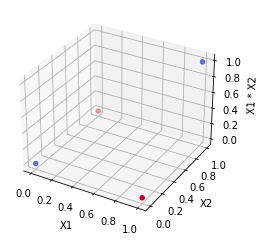

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Generate XOR data with new feature
X, Y = generate_xor_data()
X = np.column_stack((X, X[:, 0] * X[:, 1]))

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap='coolwarm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X1 * X2')
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


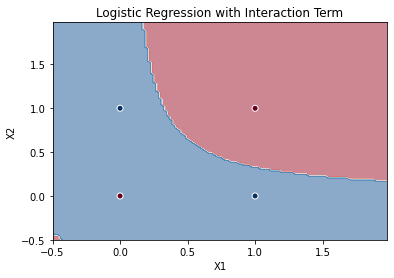

In [19]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel(), xx.ravel() * yy.ravel()]
Z = model.predict(meshData).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdBu", edgecolors="white")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression with Interaction Term")
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = ...

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

...